# Analyse population Humaine

In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from tools import calNumber, calNumberDecenies, calNumberDeceniesTotal

In [2]:
df = pd.read_csv('Data/PopulationByAgeSex.csv', index_col="Time", parse_dates=True)
print(df.shape)
df.head(10)

(66893, 70)


,Id,LocID,Location,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,...,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
Time,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1,4,Afghanistan,630.044,661.578,1291.622,516.206,487.335,1003.541,461.378,...,0.004,0.003,0.007,0.0,0.0,0.0,4099.243,3652.874,7752.117,1
1951-01-01,2,4,Afghanistan,641.199,673.293,1314.492,525.302,502.402,1027.704,465.611,...,0.007,0.005,0.012,0.0,0.0,0.0,4134.756,3705.395,7840.151,1
1952-01-01,3,4,Afghanistan,650.825,669.274,1320.099,533.097,521.672,1054.769,471.928,...,0.012,0.009,0.021,0.0,0.0,0.0,4174.450,3761.546,7935.996,1
1953-01-01,4,4,Afghanistan,659.896,663.606,1323.502,538.351,541.216,1079.567,480.448,...,0.015,0.013,0.028,0.0,0.0,0.0,4218.336,3821.348,8039.684,1
1954-01-01,5,4,Afghanistan,670.694,663.295,1333.989,540.820,557.196,1098.016,489.780,...,0.014,0.011,0.025,0.0,0.0,0.0,4266.484,3884.832,8151.316,1
1955-01-01,6,4,Afghanistan,685.797,671.613,1357.410,540.974,565.608,1106.582,497.504,...,0.006,0.006,0.012,0.0,0.0,0.0,4318.945,3952.047,8270.992,1
1956-01-01,7,4,Afghanistan,708.815,678.490,1387.305,551.476,579.897,1131.373,500.073,...,0.009,0.009,0.018,0.0,0.0,0.0,4375.800,4023.073,8398.873,1
1957-01-01,8,4,Afghanistan,727.044,693.963,1421.007,564.009,587.655,1151.664,503.520,...,0.015,0.016,0.031,0.0,0.0,0.0,4437.157,4098.000,8535.157,1
1958-01-01,9,4,Afghanistan,743.089,714.746,1457.835,577.097,588.731,1165.828,508.466,...,0.021,0.020,0.041,0.0,0.0,0.0,4503.156,4176.941,8680.097,1


In [3]:
print(df["LocID"].value_counts())
for i in df["LocID"].unique():
    print(i)

4       151
912     151
2085    151
2086    151
1505    151
       ... 
1563    151
1765    151
2064    151
2063    151
716     151
Name: LocID, Length: 443, dtype: int64
4
903
1823
1560
2080
2081
2082
2083
2084
1200
8
12
1533
24
28
32
51
533
935
1207
1824
1557
36
927
40
31
1525
1526
44
48
50
52
112
56
84
2067
2068
2069
2070
2071
2072
204
64
1527
1569
68
70
72
76
96
100
854
108
132
116
120
124
915
1530
140
916
5500
1545
921
148
830
152
156
1105
344
446
158
170
1566
2074
2075
2076
2077
2078
2079
174
178
188
1638
2094
2095
2096
2097
2098
2099
191
192
531
196
203
384
408
180
208
1106
262
214
1737
1736
1744
1746
1071
1074
1075
1073
1072
2061
2058
2059
2060
1054
1057
1055
2049
1060
1059
1058
1056
2048
2045
2046
2047
2044
2053
1064
2054
2050
1062
2051
2055
1065
2052
2056
2062
2066
2065
2063
2064
1765
1563
910
906
923
1825
1832
1538
1540
1547
218
818
222
226
232
233
748
231
1546
908
917
1506
1829
1550
1544
1549
986
242
246
250
1107
254
258
266
270
268
276
288
1536
300
308
1556
1523
1522
1524


In [4]:
#Population male for afgan 04
popAfganMale04 = df[df["LocID"]==4]["PopMale_0_4"]

#Population female for afgan 04
popAfganFemale04 = df[df["LocID"]==4]["PopFemale_0_4"]

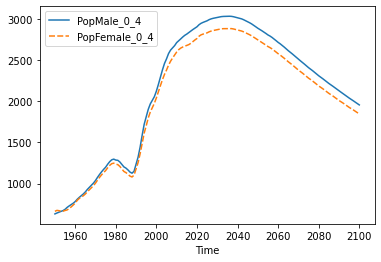

In [5]:
calNumber(popAfganMale04, popAfganFemale04)

In [6]:
#Population male for afgan 04
popAfganMale5_9 = df[df["LocID"]==4]["PopMale_5_9"]

#Population female for afgan 04
popAfganFemale5_9 = df[df["LocID"]==4]["PopFemale_5_9"]

                   0
Time                
1950-01-01  1146.250
1951-01-01  1166.501
1952-01-01  1183.922
1953-01-01  1198.247
1954-01-01  1211.514
                   0
Time                
1950-01-01  1148.913
1951-01-01  1175.695
1952-01-01  1190.946
1953-01-01  1204.822
1954-01-01  1220.491


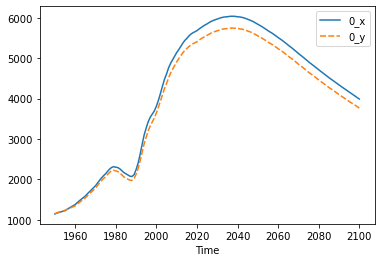

In [7]:
calNumberDecenies(popAfganMale04, popAfganMale5_9, popAfganFemale04, popAfganFemale5_9)

                   0
Time                
1950-01-01  2295.163
1951-01-01  2342.196
1952-01-01  2374.868
1953-01-01  2403.069
1954-01-01  2432.005


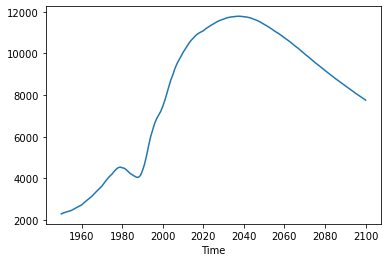

In [8]:
calNumberDeceniesTotal(popAfganMale04, popAfganMale5_9, popAfganFemale04, popAfganFemale5_9)